<a href="https://colab.research.google.com/github/Harsh-58/DataScienceA2/blob/main/Copy_of_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

  If we only have one model, elpd_loo still provides a measure of how well the model is likely to predict unseen data by evaluating its predictive performance on different subsets of the data. However, its main purpose is to compare models, so while it's somewhat informative, it is most valuable when evaluating multiple models to select the best one.

**Task2**:

Describe overfitting, in the context of this course

Overfitting occurs when a model becomes overly complex and captures not just the underlying patterns in the data but also the random noise and outliers. This leads to excellent performance on training data but poor generalization to unseen data, which means the model fails to identify the true structure of the problem. It could be a sign that the model lacks a balance between complexity and simplicity.

**Task3**:

How do we mitigate overfitting?

   Overfitting can be mitigated by simplifying the model, such as reducing the number of predictors or introducing regularization techniques. Cross-validation is also a useful tool to test the model's ability to generalize to new data. Increasing the size of the training dataset could also help the model better capture true patterns rather than noise.


**Task4**:

How do we mitigate underfitting?

Underfitting can be addressed by increasing the complexity of the model to allow it to better capture the underlying relationships in the data. This could involve adding more predictors and/or trying non-linear models. Improving predictor selection can also help mitigate underfitting.

**Task5**:

Why would we want more than one predictor in a model?

 Including more predictors allows the model to capture additional dimensions of the data, providing a more complete understanding of the relationships and reducing the likelihood of leaving out important factors. This can improve the model's accuracy, explain more of the variance in the response variable, and make predictions more reliable across different scenarios.


**Task6**:

Can we have too many predictors? How would we now?

   Yes, having too many predictors can lead to overfitting, where the model becomes overly complex and starts capturing noise rather than meaningful patterns. This can be identified through metrics like high variance in predictions, poor performance on validation data, or if the predictors have high multicollinearity (undermines the statistical significance of an independent variable), which can make interpretation and model stability challenging.


**Task7**:

What is variable selection, and how does it work?

  Variable selection is the process of identifying the most important predictors for a model to ensure it is both accurate and interpretable. It can be done manually using domain knowledge or algorithmically. The goal is to include only predictors that add significant value to the model while excluding redundant or irrelevant ones.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

 - **Adding the variables, as is standard:** The categorical variable and other predictors are included independently, assuming no interactions or dependencies between them.  
 - **Using the categorical variable as a hierarchy:** This approach assumes that the relationship of the other predictor varies by category, resulting in group-specific effects such as differing intercepts or slopes.  
 - **Adding interaction terms:** This model captures both independent effects and any interaction between the categorical variable and the other predictor, reflecting how they influence each other.  

   **Similarity:** All three approaches incorporate the categorical variable, but they differ in how the variable is treated and the complexity of its interaction with other predictors.


**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

Due to the multidimensional nature of the model, it's impossible to represent all predictors and predicted values in a single visual representation. However, we can create 2D graphs that showcase the relationship between one predictor and the predicted value by holding all other predictors constant. This allows us to examine the impact of individual predictors while controlling for others.
We also have tools like posterior predictive checks and elpd_loo charts at our disposal. While these are valuable for model comparison, they're less effective for standalone model visualization. These methods are particularly useful when we need to evaluate the relative performance of different models rather than gaining insights into the structure of a single model.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [1]:
!pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import bambi as bmb
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [3]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

<ipython-input-3-bb9f7b7913fd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)


In [4]:
ft_pos_cat = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [5]:
ft_pos_h = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 9 divergences after tuning. Increase `target_accept` or reparameterize.


In [6]:
ft_pos_inter = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [7]:
ft_pos_3pt_inter = bmb.Model("`FGp` ~ FTp + Pos + `3PA` + FTp:Pos + FTp:`3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [8]:
ft_pos_3pt_inter2 = bmb.Model("`FGp` ~ `FTp` + Pos + `3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

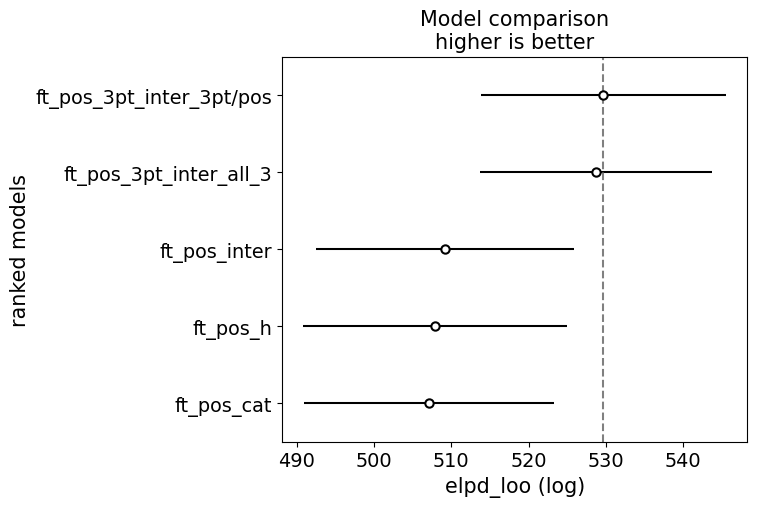

In [9]:
compare = az.compare({"ft_pos_cat":ft_pos_cat, "ft_pos_h":ft_pos_h, "ft_pos_inter":ft_pos_inter, "ft_pos_3pt_inter_all_3":ft_pos_3pt_inter, "ft_pos_3pt_inter_3pt/pos":ft_pos_3pt_inter2})
az.plot_compare(compare)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

Models that incorporate three-point attempts perform better than those that exclude them. Comparing the two models with three-point attempts, the one emphasizing only the interaction between 3PA and position is superior to the one that includes interactions among all three variables. This is likely because players who attempt more three-pointers tend to be better shooters overall, including at free throws. Taking more three-point shots may enhance shooting skills, while players with weaker shooting abilities are less likely to attempt them in the first place.